<table align="left">
  <td>
    <a href="https://colab.research.google.com/drive/1c2NOMFBvEJnrwEHkJKttmXGE2NE7a1RP" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
</table>

# Algoritmo de búsqueda del camino más corto: Dijkstra


In [ ]:
!apt install libgraphviz-dev > /dev/null 2>&1
!pip install -q pygraphviz


In [ ]:
import json;

# lee el fichero conteniendo el grafo.

with open("./Dijkstra - ciudades.json","rt") as fd:
     ciudades=json.load(fd);
     for ciudad in ciudades.keys():
         ciudades[ciudad]=ciudades[ciudad][:3]; # nos quedamos con los 3 primeros

for ciudad in ciudades.keys():
    print(ciudad, ciudades[ciudad]);


Madrid [['Guadalajara', 51.49866298363274], ['Toledo', 68.02937873369657], ['Segovia', 68.61606184641727]]
Barcelona [['Tarragona', 82.61031507716173], ['Gerona', 85.11774024414085], ['Lérida', 131.68696677072788]]
Valencia [['Castellón de la Plana', 64.30186811752351], ['Alicante', 125.58661542485352], ['Albacete', 137.9296114501864]]
Sevilla [['Huelva', 85.53297764731816], ['Cádiz', 99.09560713576518], ['Córdoba', 120.70110712530347]]
Zaragoza [['Lérida', 125.37183414872015], ['Pamplona', 144.0760273478628], ['Logroño', 157.32245901307317]]
Málaga [['Granada', 88.68735964807958], ['Ceuta', 121.78533551199646], ['Jaén', 129.67240716615245]]
Murcia [['Alicante', 68.40412898650266], ['Albacete', 128.12658402643052], ['Almería', 173.84282689347808]]
Palma [['Barcelona', 205.31284128604142], ['Tarragona', 210.61745545132234], ['Castellón de la Plana', 238.98785080880998]]
Las Palmas de Gran Canaria [['Santa Cruz de Tenerife', 88.29446408225643], ['Cádiz', 1267.7030453608536], ['Ceuta', 12

In [ ]:
def pinta_el_grafo(G, colores=None):
    plt.figure(1, figsize=(16, 8));
    pos = nx.nx_agraph.graphviz_layout(G, prog="neato");
    labels = nx.get_edge_attributes(G, 'weight');
    c = [0.9] * nx.number_of_nodes(G);
    nx.draw(G, pos, node_size=900, vmin=0.0, vmax=1.0, with_labels=True, font_size=8, node_color=colores if colores else c);
    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels, font_size=8);
    plt.show();


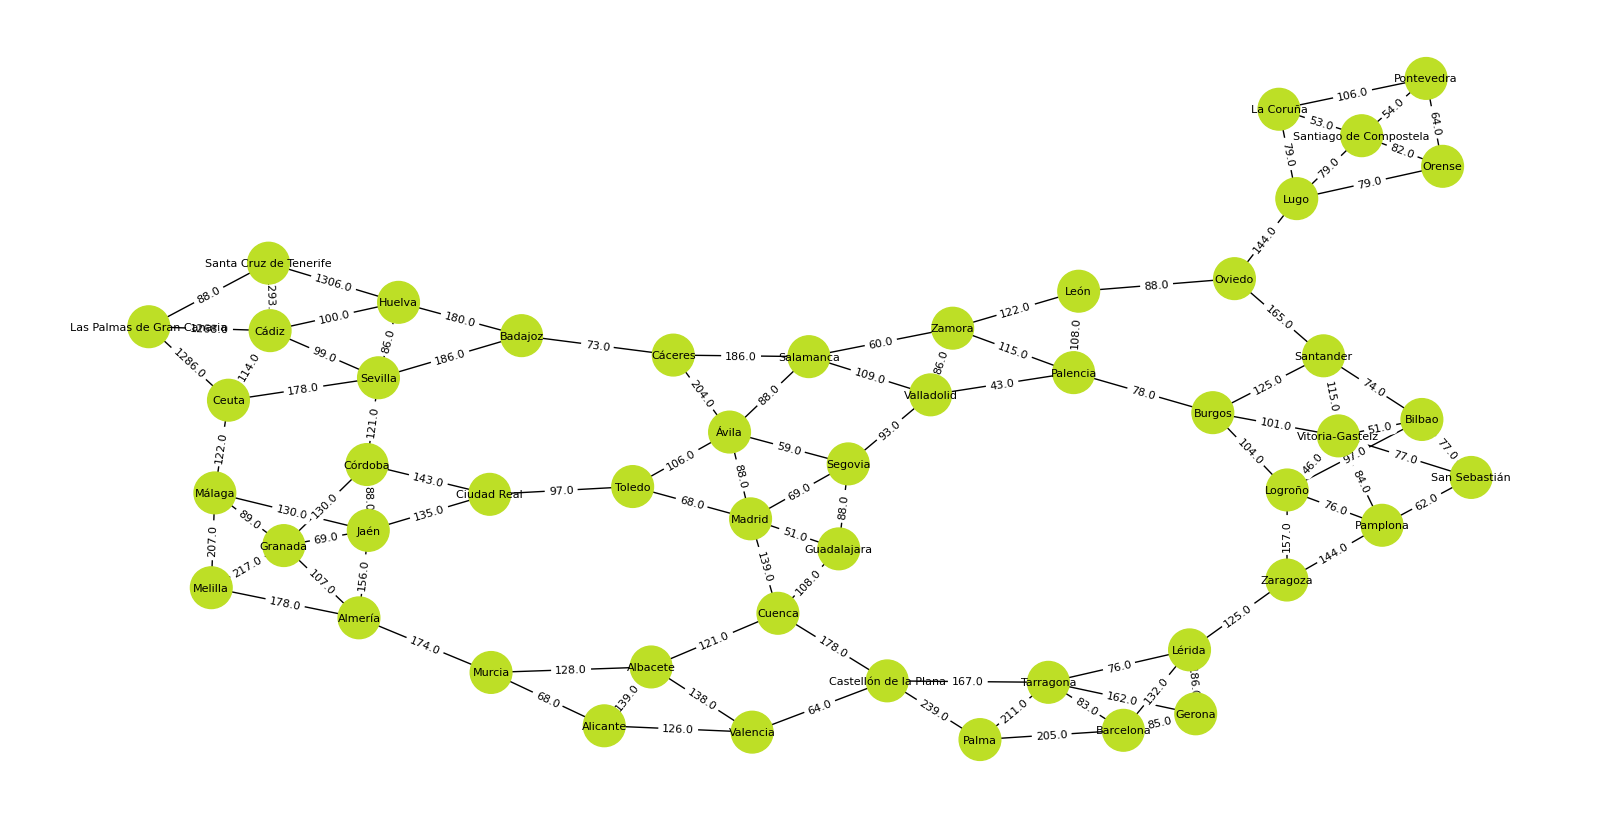

In [ ]:
import networkx as nx;
import matplotlib.pyplot as plt;

assert len(ciudades.keys())>0;

G = nx.Graph();

G.add_nodes_from(ciudades.keys());

# es un grafo NO dirigido, así que da igua A -> B que B -> A.
for c1 in ciudades.keys():
    con=ciudades[c1];
    for c2 in con:
        G.add_edge(c1,c2[0], weight=round(c2[1],0));

# representamos el grafo
pinta_el_grafo(G);


## **Dijkstra**


He encontrado la ruta:
  Valencia 993.0 km.
  Castellón de la Plana 929.0 km.
  Cuenca 751.0 km.
  Guadalajara 643.0 km.
  Segovia 555.0 km.
  Valladolid 462.0 km.
  Palencia 419.0 km.
  León 311.0 km.
  Oviedo 223.0 km.
  Lugo 79.0 km.
  La Coruña 0 km.


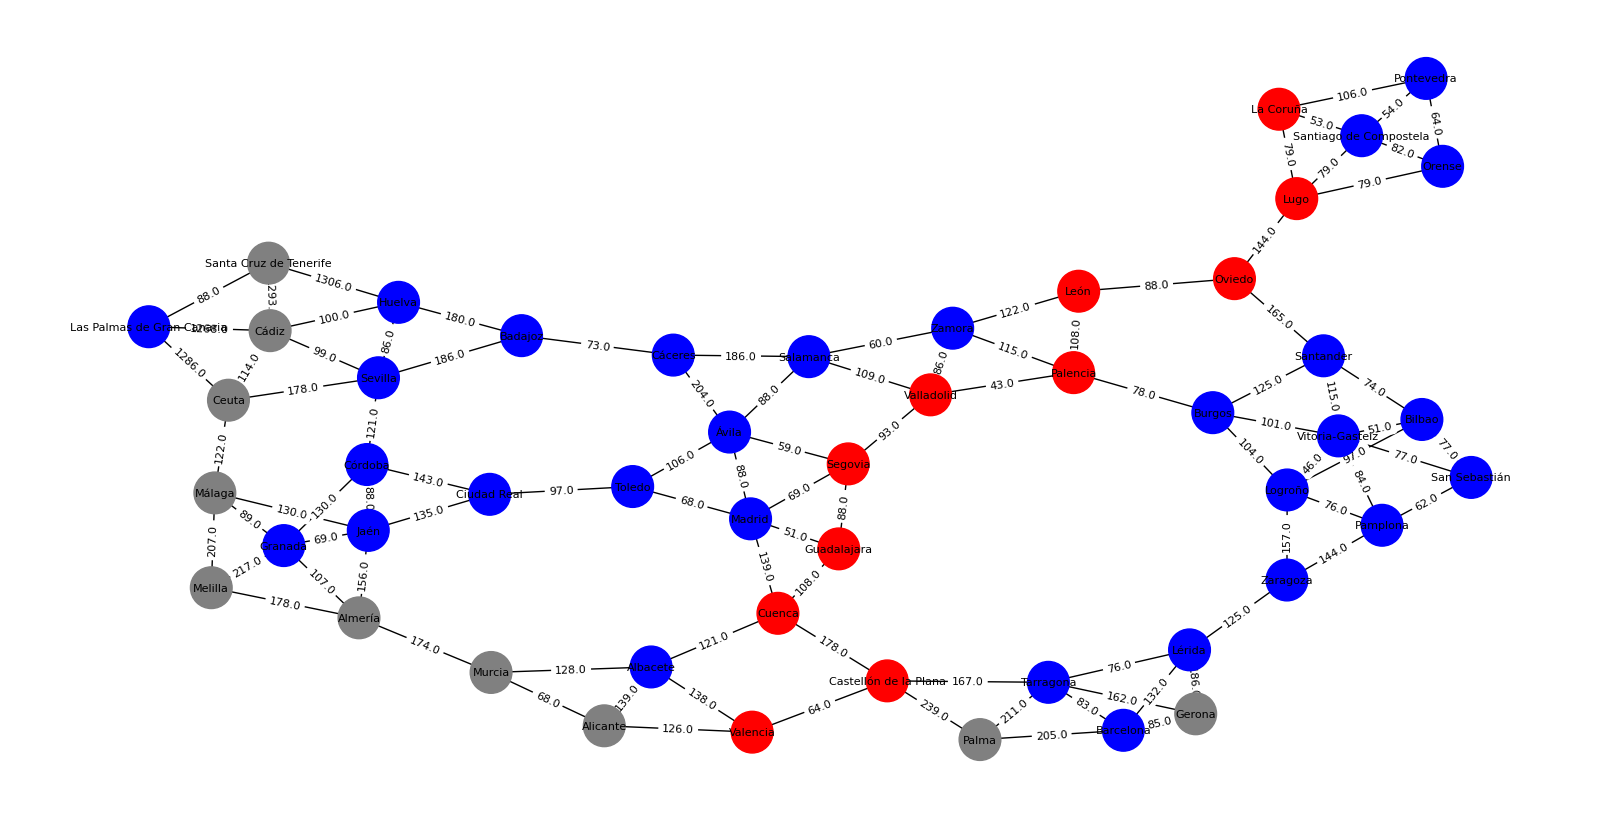

In [ ]:
D={};
for node in G.nodes:
    D[node]={'nombre':node, 'distancia':float("+inf"), 'padre':None };

final   ="Valencia";
inicial ="La Coruña";

abiertos=[inicial];
cerrados=[];

D[inicial]["distancia"]=0;

while abiertos:
      m=min(abiertos, key=lambda d: D[d]["distancia"]);
      actual=abiertos.pop(abiertos.index(m));
      cerrados.append(actual);
      if actual==final: break;
      for siguiente in G[actual]:
          if not siguiente in cerrados:
             d=G[actual][siguiente]["weight"];
             if D[siguiente]["distancia"] > D[actual]["distancia"] + d:
                D[siguiente]["distancia"] = D[actual]["distancia"] + d;
                D[siguiente]["padre"    ] = actual;
                abiertos.append(siguiente);

if final in cerrados:
   print("He encontrado la ruta:");
   path=[];
   actual=final;
   while actual!=None:
         print(" ",actual, f"{D[actual]['distancia']} km.");
         path.append(actual);
         actual=D[actual]["padre"];

   colors=["red" if node in path else ("grey" if node in abiertos else "blue") for node in G];

   pinta_el_grafo(G, colores=colors);

else:
   print("No he encontrado la ruta");
